In [2]:
import tweepy
from tweepy import OAuthHandler

In [3]:
consumer_key = 'YOUR_KEY'
consumer_secret = 'YOUR_SECRET'
access_token = 'YOUR_TOKEN'
access_secret = 'YOUR_TOKEN_SECRET'

In [4]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth)

In [60]:
# the stream to gather tweets about an event or topic based on the search term

from tweepy import Stream
from tweepy.streaming import StreamListener
 
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('yourjsonfile.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['YOUR_SEARCH_TERM'])

'from tweepy import Stream\nfrom tweepy.streaming import StreamListener\n \nclass MyListener(StreamListener):\n \n    def on_data(self, data):\n        try:\n            with open(\'juvreal.json\', \'a\') as f:\n                f.write(data)\n                return True\n        except BaseException as e:\n            print("Error on_data: %s" % str(e))\n        return True\n \n    def on_error(self, status):\n        print(status)\n        return True\n \ntwitter_stream = Stream(auth, MyListener())\ntwitter_stream.filter(track=[\'#JuveReal\'])'

In [1]:
import json

In [2]:
#check the structure of a tweet

with open('juvreal.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dict
    print(json.dumps(tweet, indent=4)) # pretty-print

{
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
    "in_reply_to_user_id": null,
    "retweeted": false,
    "text": "Bah... meh... \ud83d\ude36 #JuveReal",
    "user": {
        "profile_background_tile": false,
        "name": "Kristina",
        "default_profile": false,
        "description": "Mum. In love. Coffee lover \u2615\ufe0f Football enthusiast.",
        "followers_count": 354,
        "contributors_enabled": false,
        "screen_name": "XtinaTinka",
        "profile_background_color": "94D487",
        "following": null,
        "profile_sidebar_fill_color": "DDEEF6",
        "translator_type": "none",
        "id": 1354881960,
        "notifications": null,
        "is_translator": false,
        "lang": "en",
        "profile_banner_url": "https://pbs.twimg.com/profile_banners/1354881960/1521128850",
        "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/527540772266995712/yKB6v

In [6]:
#tokenizing a tweet

from nltk.tokenize import TweetTokenizer
from collections import Counter
from nltk.corpus import stopwords
import string

In [7]:
tknzr = TweetTokenizer(strip_handles=True)

In [8]:
# list of words, punctuation and emoticons to get rid of when tokenizing a tweet

punctuation = list(string.punctuation)
other = [':\\','null',':[','false',':{','🔴','⚪','RT','…','️','...','la','di','che','e','il','è','un','per','de','’','non',
        '⚽','😂','ha','si','da','’','non','🇪']
stop = stopwords.words('english')+stopwords.words('spanish') + stopwords.words('french') + punctuation + other 

In [17]:
#process all tweets to check for hashtags, time of creation, language of tweet and source of the tweet

terms = []
time = []
language = []
source = []
with open('juvreal.json','r') as f:
    
    for line in f:
        try:       
            tweet = json.loads(line)
            terms.append(word for word in tknzr.tokenize(tweet['text'])if word[0] == '#')   
            time.append(tweet['created_at'])
            language.append(tweet['lang'])
            source.append(tweet['source'].split('</a>')[0].split()[-1])
        except:
            continue

In [12]:
#data analysis with pandas and visualization with matplotlib

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline

In [18]:
idx = pd.DatetimeIndex(time)
hashtags = pd.DataFrame(data = terms,index = idx)

In [19]:
hashtags.head()

,0,1,2,3,4,5,6,7,8,9,10,11
2018-04-03 20:38:19,#JuveReal,None,None,None,None,None,None,None,None,None,None,None
2018-04-03 20:38:19,None,None,None,None,None,None,None,None,None,None,None,None
2018-04-03 20:38:20,#Juventus,None,None,None,None,None,None,None,None,None,None,None
2018-04-03 20:38:20,None,None,None,None,None,None,None,None,None,None,None,None
2018-04-03 20:38:20,#JuveReal,None,None,None,None,None,None,None,None,None,None,None


In [20]:
bytime = hashtags.resample('T').count()

In [21]:
timelabels = [ datetime.strptime(str(times),"%Y-%m-%d %H:%M:%S") for times in bytime.index]

Text(0.5,1,'Number of Tweets per minute')

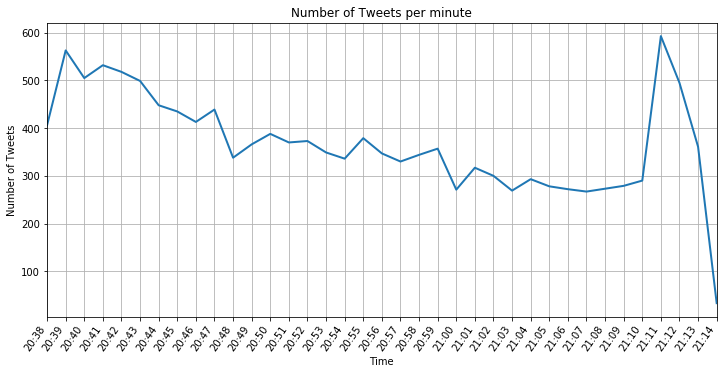

In [22]:
fig, axes = plt.subplots(figsize = (12,6))

minutes = dates.MinuteLocator()
dfmt = dates.DateFormatter('%H:%M')
x = timelabels
y = bytime[0]

axes.xaxis.set_major_locator(minutes)
axes.xaxis.set_major_formatter(dfmt)
    
axes.set_xlim(timelabels[0],timelabels[-1])
axes.plot(x,y,linewidth=2)
axes.grid(True)
fig.autofmt_xdate(rotation=55)

axes.set_xlabel('Time')
axes.set_ylabel('Number of Tweets')
axes.set_title('Number of Tweets per minute')

In [13]:
lang = pd.DataFrame(data = language,columns=['language'])

In [14]:
#list of languages supported by twitter

lst = [('English (default)','en'),
('Arabic','ar'),
('Bengali','bn'),
('Czech','cs'),
('Danish','da'),
('German','de'),
('Greek','el'),
('Spanish','es'),
('Persian','fa'),
('Finnish','fi'),
('Filipino','fil'),
('French','fr'),
('Hebrew','he'),
('Hindi','hi'),
('Hungarian','hu'),
('Indonesian','id'),
('Italian','it'),
('Japanese','ja'),
('Korean','ko'),
('Malay','msa'),
('Dutch','nl'),
('Norwegian','no'),
('Polish','pl'),
('Portuguese','pt'),
('Romanian','ro'),
('Russian','ru'),
('Swedish','sv'),
('Thai','th'),
('Turkish','tr'),
('Ukrainian','uk'),
('Urdu','ur'),
('Vietnamese','vi'),
('Chinese (Simplified)','zh-cn'),
('Chinese (Traditional)','zh-tw')]

In [15]:
newlang = []
lst2 = [l[1] for l in lst]
for i in lang['language']:
        if i in lst2:
        
            for j in lst:
                if i == j[1]:
                    newlang.append(j[0])
        else:
            newlang.append('other')

In [16]:
lang['languages'] = newlang

In [17]:
lang.columns = ['Abbreviation','languages']

In [18]:
lang.head()

,Abbreviation,languages
0,in,other
1,es,Spanish
2,en,English (default)
3,in,other
4,it,Italian


In [19]:
countlang = lang['languages'].value_counts()

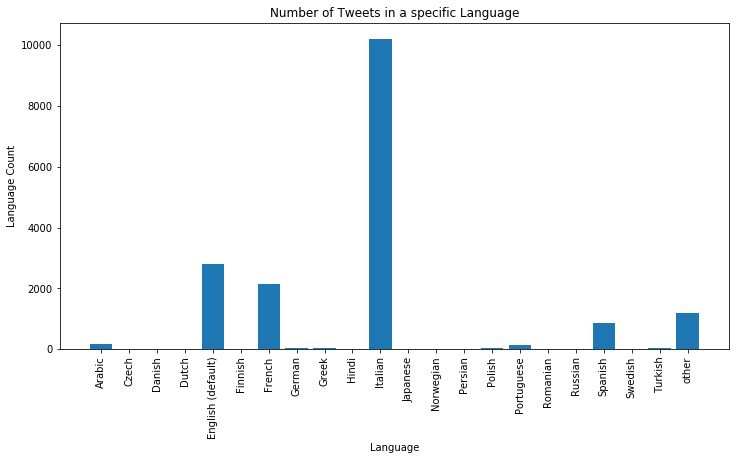

In [20]:
fig, axes = plt.subplots(figsize=(12,6))
axes.bar(x = countlang.index,height=countlang)
axes.set_xlabel('Language')
axes.set_ylabel('Language Count')
axes.set_title('Number of Tweets in a specific Language')
for tick in axes.get_xticklabels():
    tick.set_rotation(90)

In [24]:
sourcedf = pd.DataFrame(data = source,columns = ['Source'])

In [25]:
sourcedf.head()

,Source
0,iPhone
1,Android
2,Android
3,Android
4,Android


In [28]:
sourcedf['Source'].value_counts().head(5)

Android    8141
iPhone     6524
Client     1703
Lite        588
iPad        434
Name: Source, dtype: int64

In [70]:
check = ['Android','iPhone','Client',]